In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Leitura do arquivo CSV com os dados das emendas (Portal da Transparência)
emendas = pd.read_csv(r'Emendas.csv', encoding='ISO-8859-1', sep=';', on_bad_lines='skip', decimal=',')


# Filtro dos dados de emendas para o período de 2018 a 2022 e para a função "Saúde"
emendas_saude = emendas[(emendas['Ano da Emenda'] >= 2018) & (emendas['Ano da Emenda'] <= 2022) & (emendas['Nome Função'] == 'Saúde')]


# Agrupa os dados por ano e soma os valores das colunas monetárias
emendas_saude_sum = emendas_saude.groupby('Ano da Emenda')[['Valor Empenhado', 'Valor Liquidado', 'Valor Pago']].sum()

,Código da Emenda,Ano da Emenda,Tipo de Emenda,Código do Autor da Emenda,Nome do Autor da Emenda,Número da emenda,Localidade do gasto,Código Função,Nome Função,Código Subfunção,Nome Subfunção,Valor Empenhado,Valor Liquidado,Valor Pago,Valor Restos A Pagar Inscritos,Valor Restos A Pagar Cancelados,Valor Restos A Pagar Pagos
17714,201830300004,2018,Emenda Individual,3030,ABEL MESQUITA JR.,0004,RORAIMA (UF),10,Saúde,122,Administração geral,6486136.00,0.0,0.0,0.00,0.0,6486136.0
17715,201830300005,2018,Emenda Individual,3030,ABEL MESQUITA JR.,0005,RORAIMA (UF),10,Saúde,301,Atenção básica,799942.00,196000.0,196000.0,399942.00,0.0,204000.0
17716,201830300006,2018,Emenda Individual,3030,ABEL MESQUITA JR.,0006,Nacional,10,Saúde,302,Assistência hospitalar e ambulatorial,100000.00,100000.0,100000.0,0.00,0.0,0.0
17719,201826330003,2018,Emenda Individual,2633,ACIR GURGACZ,0003,SÃO PAULO (UF),10,Saúde,302,Assistência hospitalar e ambulatorial,200000.00,0.0,0.0,0.00,1100.0,198900.0
17720,201826330004,2018,Emenda Individual,2633,ACIR GURGACZ,0004,SÃO PAULO (UF),10,Saúde,122,Administração geral,1000000.00,1000000.0,1000000.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54348,202240910013,2022,Emenda Individual,4091,ZENAIDE MAIA,0013,NATAL - RN,10,Saúde,302,Assistência hospitalar e ambulatorial,211564.00,211564.0,211564.0,0.00,0.0,0.0
54351,202241820002,2022,Emenda Individual,4182,ZEQUINHA MARINHO,0002,PARÁ (UF),10,Saúde,302,Assistência hospitalar e ambulatorial,6269254.00,6269254.0,6269254.0,0.00,0.0,0.0
54352,202241820003,2022,Emenda Individual,4182,ZEQUINHA MARINHO,0003,PARÁ (UF),10,Saúde,301,Atenção básica,2161812.00,2161812.0,2161812.0,0.00,0.0,0.0
54353,202241820004,2022,Emenda Individual,4182,ZEQUINHA MARINHO,0004,PARÁ (UF),10,Saúde,301,Atenção básica,984646.00,0.0,0.0,984646.00,0.0,0.0


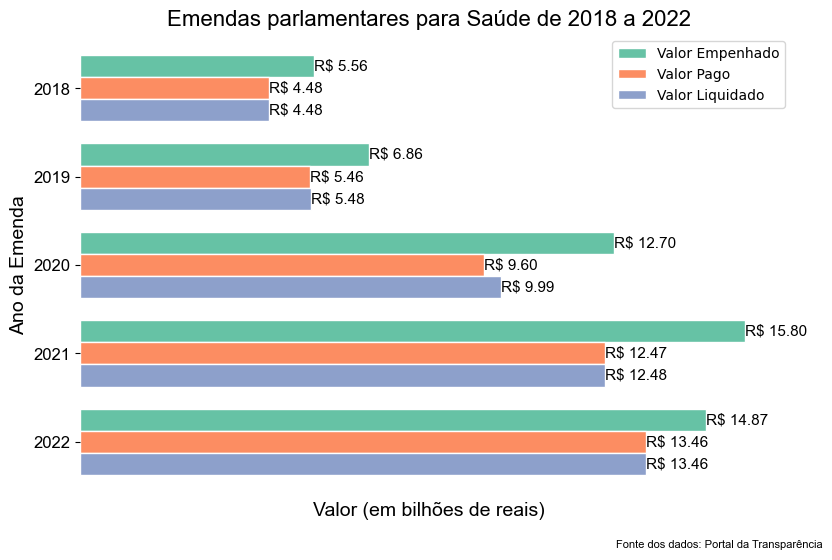

In [3]:
# Configuração para plotagem do gráfico:

# Dimensões
fig, ax = plt.subplots(figsize=(9, 6))

# Definir a largura das colunas
bar_height = 0.25

# Definir a sequência de valores para cada coluna
r1 = np.arange(len(emendas_saude_sum.index))
r2 = [x + bar_height for x in r1]
r3 = [x + bar_height for x in r2]

# Definir das colunas e cores correspondentes
columns = ['Valor Empenhado', 'Valor Pago', 'Valor Liquidado']
colors = [0, 1, 2]

# Plotagem das barras para cada coluna
for i, column in enumerate(columns):
    plt.barh(r1 + i * bar_height, emendas_saude_sum[column].values, color=plt.cm.Set2(colors[i]), height=bar_height, edgecolor='white', label=column)

# Adicionar os valores nas barras com formatação compacta e afasta os rótulos
for i, column in enumerate(columns):
    for j, value in enumerate(emendas_saude_sum[column]):
        formatted_value = 'R$ {:,.2f}'.format(value / 1000000000)  # Formatando para bilhões com três casas decimais
        plt.text(value + 0.5, r1[j] + i * bar_height, formatted_value, ha='left', va='center', fontsize=11, fontweight='normal', fontfamily='Arial')

# Adicionar o título do gráfico
plt.title('Emendas parlamentares para Saúde de 2018 a 2022', fontsize=16, fontweight='normal', fontfamily='Arial')

# Adicionar os rótulos dos eixos x e y com fonte e tamanho configurados
plt.ylabel('Ano da Emenda', fontsize=14, fontweight='normal', fontfamily='Arial')
plt.xlabel('Valor (em bilhões de reais)', fontsize=14, fontweight='normal', fontfamily='Arial')
plt.yticks(fontsize=12, fontfamily='Arial')  # Configura fonte e tamanho dos rótulos do eixo y

# Definir as posições e labels do eixo y
plt.yticks([r + bar_height for r in range(len(emendas_saude_sum.index))], emendas_saude_sum.index)

# Inverter o eixo y
plt.gca().invert_yaxis()

# Excluir os valores da escala do eixo X (opcional)
plt.xticks([])

# Excluir a linha de quadro do gráfico (opcional)
plt.box(False)

# Adicionar a legenda
plt.legend(loc='upper right', bbox_to_anchor=(1.02, 1))

# Adicionar o crédito para a fonte dos dados no canto inferior direito
source_credit = "Fonte dos dados: Portal da Transparência"
plt.text(0.95, 0.02, source_credit, transform=fig.transFigure, fontsize=8, ha='right', va='bottom', fontfamily='Arial')

# Plotar o gráfico
plt.show()